In [1]:
from matplotlib import patches
import matplotlib.pyplot as plt
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy

In [2]:
def draw_segments(item):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

    plt.show()

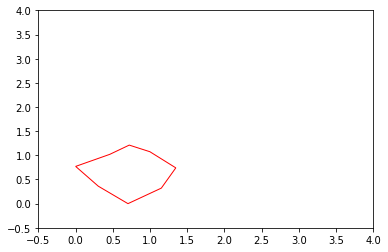

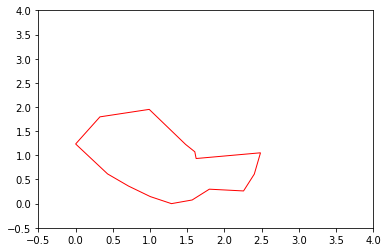

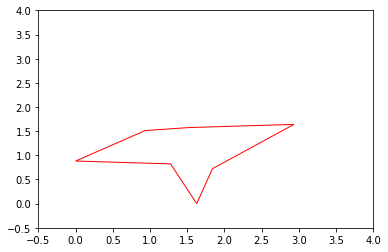

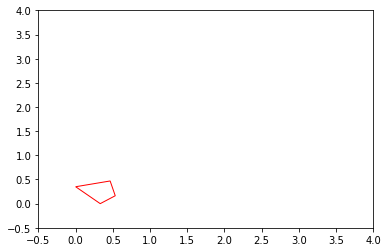

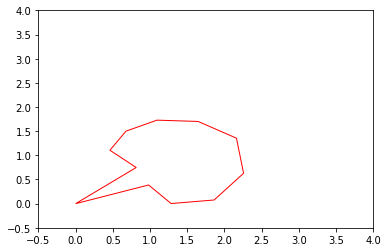

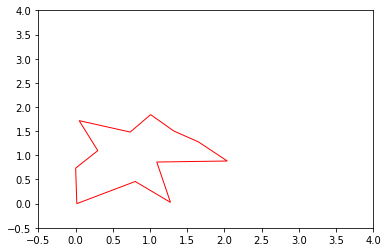

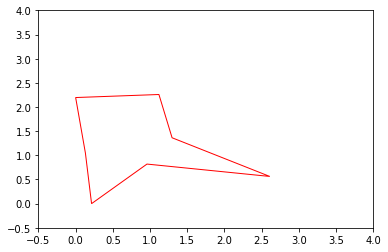

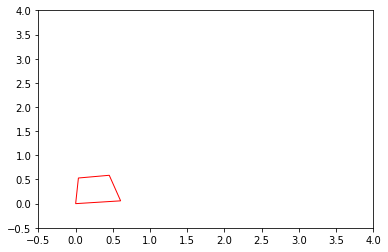

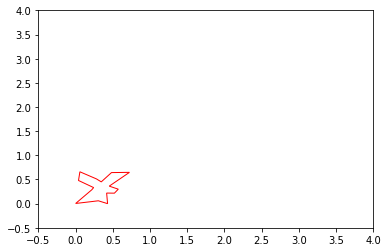

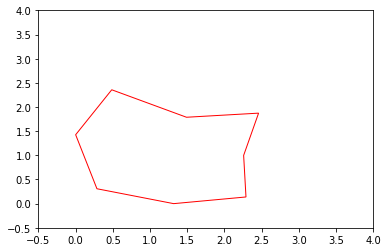

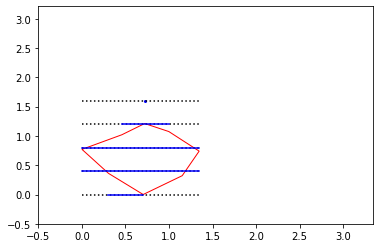

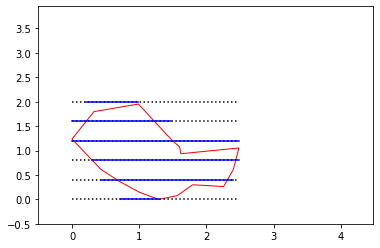

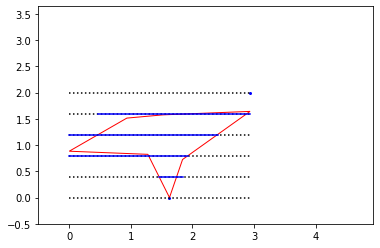

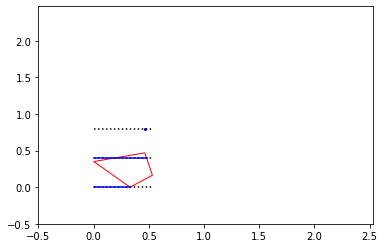

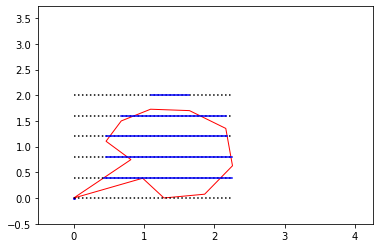

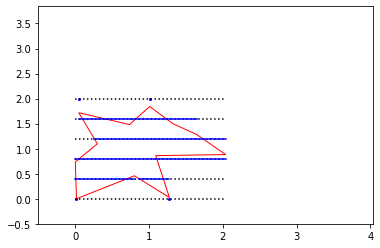

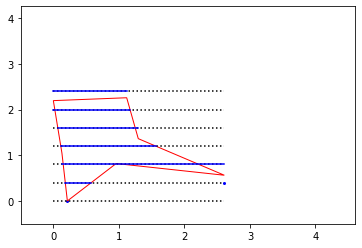

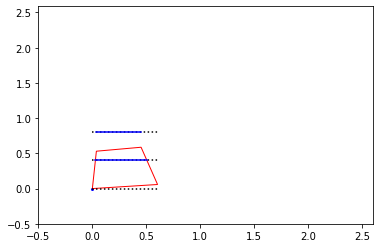

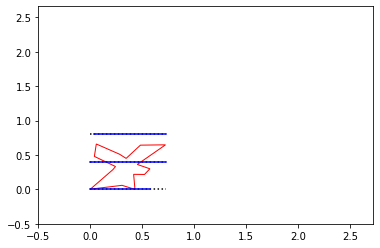

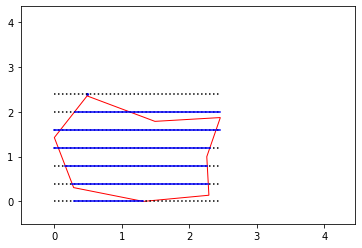

[0, 0]
[1.346076046806985, 0]
[3.8305150983831453, 0]
[3.7471536186007484, 0]
[6.238734289464823, 0]
[2.824488865511384, 3]
[0, 4]
[5.7602431054337675, 0]
[8.495785781319661, 0]
[4.862755607775185, 5]


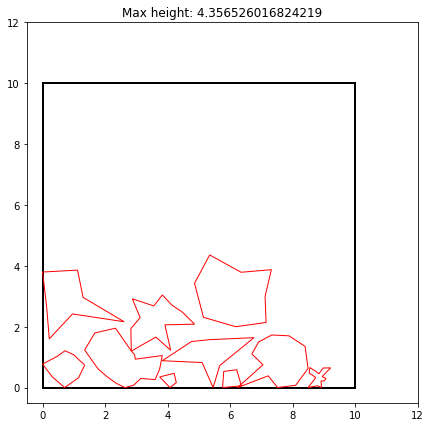

In [3]:
from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.4

packing = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.grid_step = h
pallets.add_pallet_lines()

# print(pallets.pallet_lines)

# packaging.items = items

packing.create_random_polygons(num_items= 10)

for item in packing.items:
    # print(item.points)
    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, 4)
    ax.set_ylim(-0.5, 4)


    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)
    plt.show()



packing.pallets = pallets
packing.h = h
# for item in packing.items:
#     print(item.points)
packing.add_segments_for_items()

for item in packing.items:
    draw_segments(item)
# for item in packing.items:
#     print(item.points)
packing.segments_bottom_left()
packing.draw_segments_packing()
# packing.move_packed_segment_items()
# packing.draw_segments_packing()

In [4]:
for item in packing.items:
    print(item.points)

[[0.99751353 1.07468859]
 [0.7203545  1.2115351 ]
 [0.45859603 1.020164  ]
 [0.         0.77069907]
 [0.30419734 0.36129535]
 [0.70319058 0.        ]
 [1.15156309 0.32127235]
 [1.34607605 0.7403819 ]]
[[1.67260378 1.79615667]
 [1.34607605 1.2347726 ]
 [1.77525462 0.61510581]
 [2.05695579 0.36335127]
 [2.34913958 0.14605144]
 [2.63369883 0.        ]
 [2.9121881  0.07572202]
 [3.14293265 0.29927586]
 [3.60283032 0.26276968]
 [3.74715362 0.61113627]
 [3.8305151  1.05207952]
 [2.96535066 0.93373623]
 [2.94780532 1.07292593]
 [2.82448887 1.22485178]
 [2.33492475 1.95069243]]
[[4.76556718 1.51270535]
 [3.8305151  0.88222367]
 [5.1064517  0.82250372]
 [5.45755351 0.        ]
 [5.669773   0.72437051]
 [6.76529716 1.64018606]
 [5.35350576 1.57436311]]
[[4.07751887 0.        ]
 [4.27935013 0.16326309]
 [4.2107084  0.46911349]
 [3.74715362 0.34986321]]
[[6.91512140e+00 1.50010827e+00]
 [6.69897067e+00 1.10514636e+00]
 [7.05284442e+00 7.48108781e-01]
 [6.23873429e+00 0.00000000e+00]
 [7.21955693e+